## Important libraries

In [1]:
# pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   --- ----------------------------------- 20.5/258.3 kB 682.7 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/258.3 kB 656.4 kB/s eta 0:00:01
   -------------------------- ------------- 174.1/258.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import math
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
# import nltk
import pickle
import ast
import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
# from nltk.tokenize import TweetTokenizer
# from nltk.stem.porter import PorterStemmer
# from nltk.stem import WordNetLemmatizer
# import re
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
# Downloading NLTK data
#  nltk.download('punkt')       # Downloading tokenizer data
#  nltk.download('stopwords')   # Downloading stopwords data
#  nltk.download('wordnet')

## Read and show the data

In [9]:
df=pd.read_csv("spam_ham_dataset.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'spam_ham_dataset.csv'

## Cleaning the data

In [62]:
df.drop(["label"],axis=1,inplace=True) #drop unnecessary column
df.head()

,# sent emails,text,label_num
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,"Subject: photoshop , windows , office . cheap ...",1
4,2030,Subject: re : indian springs\r\nthis deal is t...,0


In [63]:
df.isnull().sum() #no missing values in all rows

# sent emails     0
text              0
label_num         0
dtype: int64

In [64]:
df[df["# sent emails "]<0].sum() #no negative number of emails

# sent emails     0
text              0
label_num         0
dtype: object

In [65]:
df["text"].duplicated().sum() #check duplicate email

178

In [66]:
df.drop_duplicates(subset=["text"],inplace=True) #drop duplicated emails

In [67]:
df["# sent emails "].duplicated().sum() #check duplicate email

0

In [68]:
df['label_num'].unique()

array([0, 1], dtype=int64)

In [69]:
df.isna().sum()

# sent emails     0
text              0
label_num         0
dtype: int64

In [70]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [71]:
df.head()

,# sent emails,text,label_num,num_characters,num_words
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,4685,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,2030,Subject: re : indian springs\r\nthis deal is t...,0,336,71


## show information about the data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4993 entries, 0 to 5170
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   # sent emails   4993 non-null   int64 
 1   text            4993 non-null   object
 2   label_num       4993 non-null   int64 
 3   num_characters  4993 non-null   int64 
 4   num_words       4993 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 234.0+ KB


In [13]:
df.describe()

,# sent emails,label_num,num_characters,num_words
count,4993.000000,4993.000000,4993.000000,4993.000000
mean,2581.528139,0.292810,1069.426397,233.678149
std,1505.740921,0.455098,1547.863387,340.702932
min,0.000000,0.000000,11.000000,2.000000
25%,1251.000000,0.000000,256.000000,55.000000
50%,2578.000000,0.000000,557.000000,125.000000
75%,3886.000000,1.000000,1262.000000,288.000000
max,5170.000000,1.000000,32258.000000,8863.000000


## Visualization of data

<Axes: xlabel='label_num', ylabel='# sent emails '>

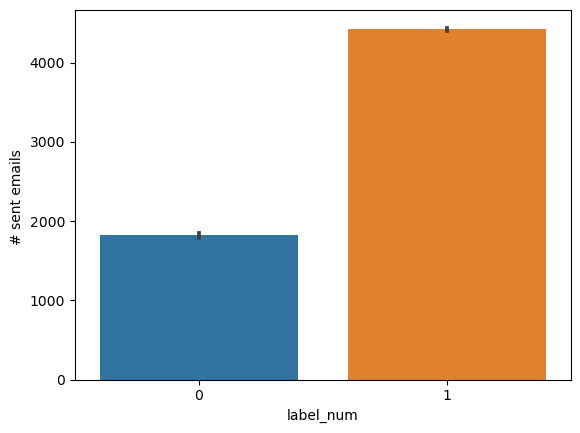

In [15]:
sns.barplot(x='label_num',y='# sent emails ',data=df)

<Axes: xlabel='label_num', ylabel='# sent emails '>

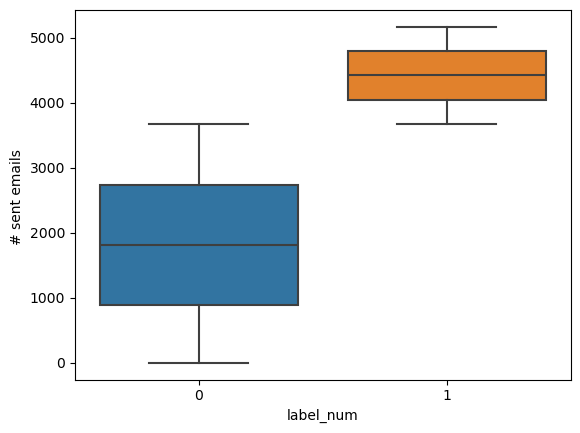

In [16]:
sns.boxplot(x='label_num',y='# sent emails ',data=df)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


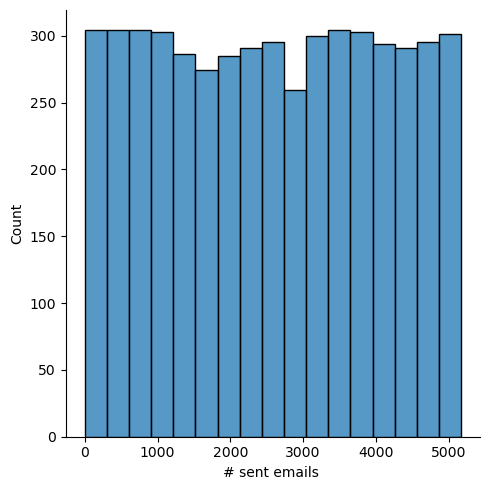

In [25]:
sns.displot(df['# sent emails '])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


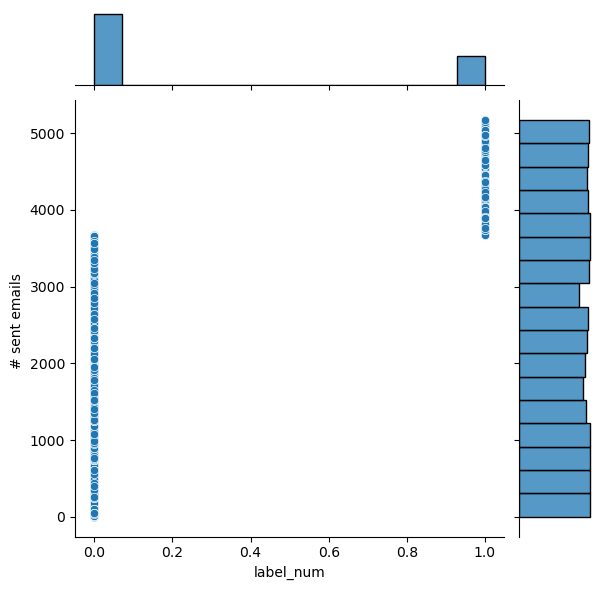

In [26]:
sns.jointplot(data=df,x=df['label_num'],y=df['# sent emails '])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


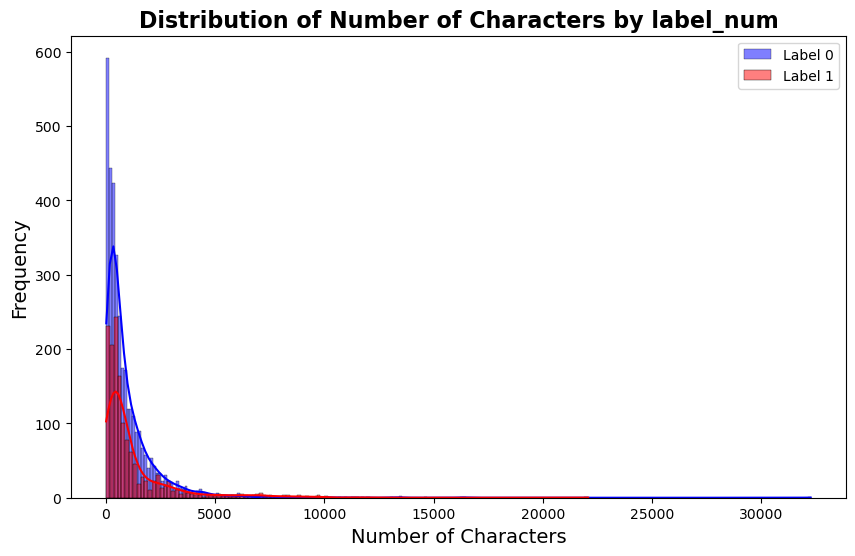

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['label_num'] == 0]['num_characters'], color='blue', label='Label 0', kde=True)

sns.histplot(df[df['label_num'] == 1]['num_characters'], color='red', label='Label 1', kde=True)

plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by label_num', fontsize=16, fontweight='bold')

plt.legend()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


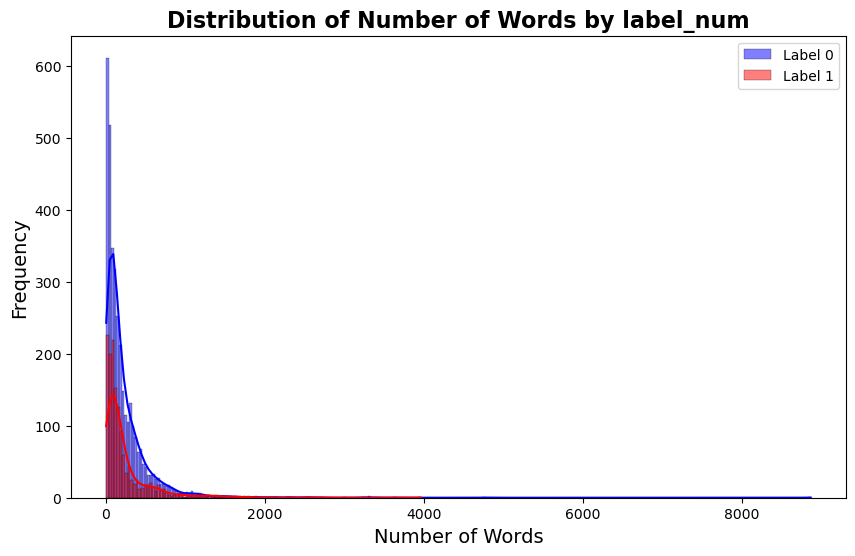

In [28]:
plt.figure(figsize=(10, 6))

sns.histplot(df[df['label_num'] == 0]['num_words'], color='blue', label='Label 0', kde=True)

sns.histplot(df[df['label_num'] == 1]['num_words'], color='red', label='Label 1', kde=True)

plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by label_num', fontsize=16, fontweight='bold')

plt.legend()
plt.show()

In [31]:
df[['label_num', 'num_characters', 'num_words','# sent emails ']].corr()

,label_num,num_characters,num_words,# sent emails
label_num,1.000000,0.074794,0.014425,0.786044
num_characters,0.074794,1.000000,0.970492,0.065696
num_words,0.014425,0.970492,1.000000,0.015497
# sent emails,0.786044,0.065696,0.015497,1.000000


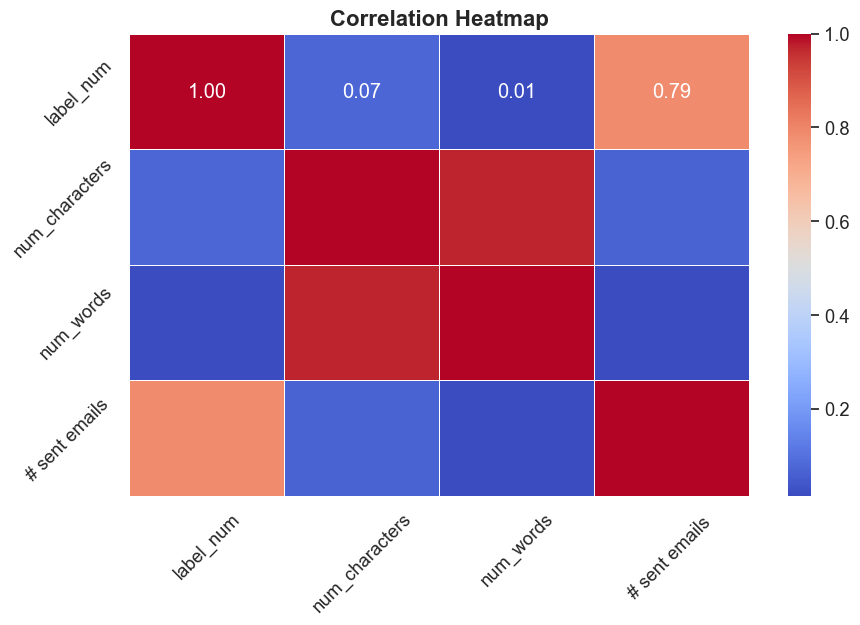

In [49]:
plt.figure(figsize=(10, 6))

correlation_matrix = df[['label_num', 'num_characters', 'num_words','# sent emails ']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

<Axes: xlabel='label_num', ylabel='count'>

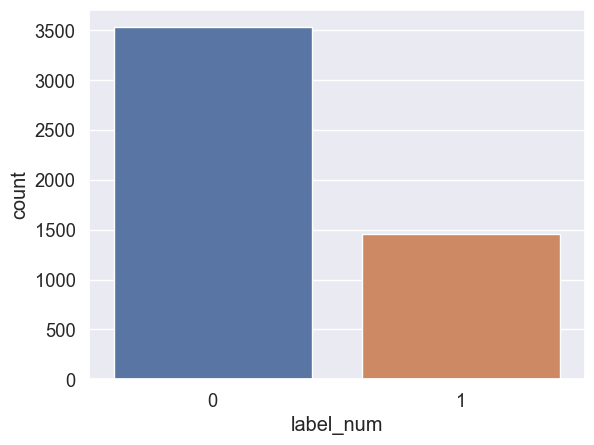

In [50]:
sns.countplot(data=df,x=df["label_num"])

## Preprocessing for the data

In [72]:
minmax_scaler=MinMaxScaler()
df['# sent emails ']=minmax_scaler.fit_transform(df['# sent emails '].values.reshape(-1,1))

In [73]:
df.head()

,# sent emails,text,label_num,num_characters,num_words
0,0.117021,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,0.454352,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,0.700967,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,0.906190,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,0.392650,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [76]:
df=df.drop(['# sent emails '],axis=1)
df=df.drop(['num_characters'],axis=1)
df=df.drop(['num_words'],axis=1)

In [77]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [78]:
def preprocess(email):
    email=re.sub("^Subject: ","",email) #remove (Subject: )
    email=re.sub("[^a-zA-Z]"," ",email) #remove special characters
    #email=re.sub("\s\w\s","",email) # remove s in 's and t in 't (like book's cover or he can't)
    email=re.sub("^\s+","",email) #remove leading space
    email=re.sub("\s+$","",email) #remove trailing space
    email=re.sub("\s+"," ",email) #remove extra spaces between words
    email=email.lower()           #lowercase every word

    return email
#test

x=preprocess(df.loc[2,"text"])
x


'neon retreat ho ho ho we re around to that most wonderful time of the year neon leaders retreat time i know that this time of year is extremely hectic and that it s tough to think about anything past the holidays but life does go on past the week of december through january and that s what i d like you to think about for a minute on the calender that i handed out at the beginning of the fall semester the retreat was scheduled for the weekend of january but because of a youth ministers conference that brad and dustin are connected with that week we re going to change the date to the following weekend january now comes the part you need to think about i think we all agree that it s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester but it can be a lot of trouble and difficult for us to get away without kids etc so brad came up with a potential alternative for how we can get together on that weekend and then you can

In [79]:
def tokenize(email):
     list_of_words=nltk.word_tokenize(email)
     return list_of_words
#test

listx=tokenize(x)
print(listx)

['neon', 'retreat', 'ho', 'ho', 'ho', 'we', 're', 'around', 'to', 'that', 'most', 'wonderful', 'time', 'of', 'the', 'year', 'neon', 'leaders', 'retreat', 'time', 'i', 'know', 'that', 'this', 'time', 'of', 'year', 'is', 'extremely', 'hectic', 'and', 'that', 'it', 's', 'tough', 'to', 'think', 'about', 'anything', 'past', 'the', 'holidays', 'but', 'life', 'does', 'go', 'on', 'past', 'the', 'week', 'of', 'december', 'through', 'january', 'and', 'that', 's', 'what', 'i', 'd', 'like', 'you', 'to', 'think', 'about', 'for', 'a', 'minute', 'on', 'the', 'calender', 'that', 'i', 'handed', 'out', 'at', 'the', 'beginning', 'of', 'the', 'fall', 'semester', 'the', 'retreat', 'was', 'scheduled', 'for', 'the', 'weekend', 'of', 'january', 'but', 'because', 'of', 'a', 'youth', 'ministers', 'conference', 'that', 'brad', 'and', 'dustin', 'are', 'connected', 'with', 'that', 'week', 'we', 're', 'going', 'to', 'change', 'the', 'date', 'to', 'the', 'following', 'weekend', 'january', 'now', 'comes', 'the', 'par

In [80]:
def remove_stopwords(email):
   clean_words=[]
   list_of_words=tokenize(email)

   for word in list_of_words:
      if(word not in stopwords.words('english')):
         clean_words.append(word)

   email=' '.join(clean_words) #convert list to string with seperator between every element (' ')

   return email
  #test
x=preprocess(df.loc[14,"text"])
xnew=remove_stopwords(x)
print(tokenize(xnew))



['tenaska', 'iv', 'july', 'darren', 'please', 'remove', 'price', 'tenaska', 'iv', 'sale', 'deal', 'july', 'enter', 'demand', 'fee', 'amount', 'thanks', 'megan']


In [81]:
def lemmatize_email(email):
    lemmatized_words=[]

    lemmatizer=WordNetLemmatizer()
    for word in tokenize(email):
        new_word=lemmatizer.lemmatize(word)
        lemmatized_words.append(new_word)
    email=' '.join(lemmatized_words)
    return email

#test
x=preprocess(df.loc[14,"text"])
xnew=remove_stopwords(x)
xnew2=lemmatize_email(xnew)
xnew2



'tenaska iv july darren please remove price tenaska iv sale deal july enter demand fee amount thanks megan'

In [82]:
# apply the functions of preprocessing on the text column
emails=df['text'].apply(preprocess)
emails=emails.apply(remove_stopwords)
emails=emails.apply(lemmatize_email)
df['preprocessed_text']=emails

In [83]:
df.head()

,text,label_num,preprocessed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter follow note gave monday p...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom january see attached file hplnol xl hp...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonderful time ye...
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop window office cheap main trending ab...
4,Subject: re : indian springs\r\nthis deal is t...,0,indian spring deal book teco pvr revenue under...


In [84]:
df.drop('text',axis=1,inplace=True)

In [85]:
#convert to vectors
# Initialize TfidfVectorizer with adjusted parameters
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_text'])

In [86]:
vectors=tfidf_matrix.toarray()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4993 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   label_num          4993 non-null   int64 
 1   preprocessed_text  4993 non-null   object
dtypes: int64(1), object(1)
memory usage: 246.1+ KB


In [88]:
df.head()

,label_num,preprocessed_text
0,0,enron methanol meter follow note gave monday p...
1,0,hpl nom january see attached file hplnol xl hp...
2,0,neon retreat ho ho ho around wonderful time ye...
3,1,photoshop window office cheap main trending ab...
4,0,indian spring deal book teco pvr revenue under...


In [89]:
def onehotendoder(df):
    label_0=[]
    label_1=[]
    labels=[]
    for i in range(len(df)):
        if df['label_num'].iloc[i]==0:
            label_0.append(1.0)
            label_1.append(0.0)
            labels.append([1.0,0.0])
        elif df['label_num'].iloc[i]==1:
            label_0.append(0.0)
            label_1.append(1.0)
            labels.append([0.0,1.0])
    df['label_num_0']=np.array(label_0)
    df['label_num_1']=np.array(label_1)
    labels=np.array(labels)
    return df,labels
df,labels=onehotendoder(df)

In [90]:
df.head()

,label_num,preprocessed_text,label_num_0,label_num_1
0,0,enron methanol meter follow note gave monday p...,1.0,0.0
1,0,hpl nom january see attached file hplnol xl hp...,1.0,0.0
2,0,neon retreat ho ho ho around wonderful time ye...,1.0,0.0
3,1,photoshop window office cheap main trending ab...,0.0,1.0
4,0,indian spring deal book teco pvr revenue under...,1.0,0.0


In [91]:
df.drop('label_num',axis=1,inplace=True)

In [92]:
df.head()

,preprocessed_text,label_num_0,label_num_1
0,enron methanol meter follow note gave monday p...,1.0,0.0
1,hpl nom january see attached file hplnol xl hp...,1.0,0.0
2,neon retreat ho ho ho around wonderful time ye...,1.0,0.0
3,photoshop window office cheap main trending ab...,0.0,1.0
4,indian spring deal book teco pvr revenue under...,1.0,0.0


## Save the vectors of preprocessed emails in pickle

In [36]:
pickle.dump(tfidf_vectorizer,open('vectorizer.pkl','wb'))

In [ ]:
file = open('vectorizer.pkl', 'rb')
vectorizer = pickle.load(file)

In [38]:
pickle.dump(vectors,open('vectors.pkl','wb'))

In [ ]:
file = open('vectors.pkl', 'rb')
vectors = pickle.load(file)

## divide the data to X and Y

In [36]:
X=vectors
Y=df[['label_num_0','label_num_1']].values

## Spliting to train and test data

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [38]:
# Apply SMOTE to the training data only to solve imbalance data by oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [39]:
y_train_resampled

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [40]:
def get_element(y):
    return y[0]

balanced_y=y_train_resampled.tolist()
    
balanced_y=list(map(get_element,balanced_y))
balanced_y=np.array(balanced_y)
balanced_y

array([1, 0, 1, ..., 1, 1, 1])

<Axes: ylabel='count'>

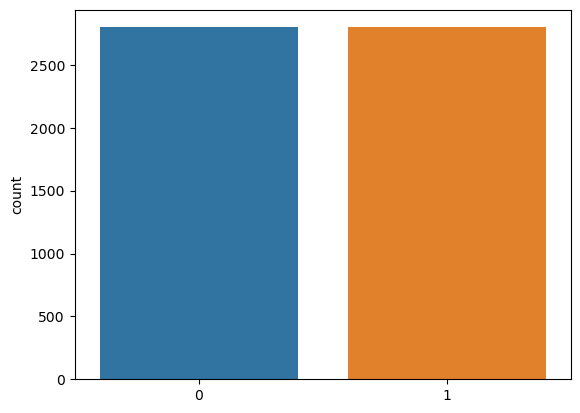

In [41]:
sns.countplot(x=balanced_y)

In [42]:
y_train_resampled=OneHotEncoder().fit_transform(y_train_resampled)

In [43]:
y_train_resampled=y_train_resampled.toarray()
y_train_resampled

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

## Training the models

In [45]:
lrc = LogisticRegression(solver='liblinear',penalty='l2',C=1.0)
multi_target_lrc = MultiOutputClassifier(lrc, n_jobs=-1)
multi_target_lrc.fit(X_train_resampled, y_train_resampled)

MultiOutputClassifier(estimator=LogisticRegression(solver='liblinear'),
                      n_jobs=-1)

In [66]:
y_pred_train1 =multi_target_lrc.predict(X_train_resampled)
y_pred_test1 =multi_target_lrc.predict(x_test)

In [47]:
train_accuracy1 = accuracy_score(y_train_resampled, y_pred_train1)
test_accuracy1 = accuracy_score(y_test, y_pred_test1)
print("training accuracy of lrc : ",str(round(train_accuracy1*100,2)),'%')
print("testing  accuracy of lrc : ",str(round(test_accuracy1*100,2)),'%')

training accuracy of lrc :  98.79 %
testing  accuracy of lrc :  96.0 %


In [ ]:
k_fold=KFold(n_splits = 5)
scores1=cross_val_score(multi_target_lrc,X,Y,cv=k_fold)
print("scores after applying cross validation of lrc : ",str(scores1))
print("average of scores of lrc : ",str(scores1.mean()))

scores after applying cross validation of lrc :  [0.98098098 0.98098098 0.98998999 0.98196393 0.98797595]
average of scores of lrc :  0.9843783663422941


In [48]:
svc = SVC(kernel='sigmoid',C=1.0)
multi_target_svc = MultiOutputClassifier(svc, n_jobs=-1)
multi_target_svc.fit(X_train_resampled, y_train_resampled)

MultiOutputClassifier(estimator=SVC(kernel='sigmoid'), n_jobs=-1)

In [81]:
y_pred_train2 =multi_target_svc.predict(X_train_resampled)
y_pred_test2 =multi_target_svc.predict(x_test)

In [50]:
train_accuracy2 = accuracy_score(y_train_resampled, y_pred_train2)
test_accuracy2 = accuracy_score(y_test, y_pred_test2)
print("training accuracy of SVC : ",str(round(train_accuracy2*100,2)),'%')
print("testing  accuracy of SVC : ",str(round(test_accuracy2*100,2)),'%')

training accuracy of SVC :  99.73 %
testing  accuracy of SVC :  97.8 %


In [ ]:
scores2=cross_val_score(multi_target_svc,X,Y,cv=k_fold)
print("scores after applying cross validation of SVC : ",str(scores2))
print("average of scores of SVC : ",str(scores2.mean()))

scores after applying cross validation of SVC :  [0.98398398 0.98598599 0.98498498 0.98597194 0.99298597]
average of scores of SVC :  0.9867825741573236


In [64]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth=12,random_state=42)
multi_target_DTC = MultiOutputClassifier(DTC, n_jobs=-1)
multi_target_DTC.fit(X_train_resampled, y_train_resampled)

MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=12,
                                                       random_state=42),
                      n_jobs=-1)

In [89]:
y_pred_train3 =multi_target_DTC.predict(X_train_resampled)
y_pred_test3 =multi_target_DTC.predict(x_test)

In [66]:
train_accuracy3 = accuracy_score(y_train_resampled, y_pred_train3)
test_accuracy3 = accuracy_score(y_test, y_pred_test3)
print("training accuracy of DTC : ",str(round(train_accuracy3*100,2)),'%')
print("testing  accuracy of DTC : ",str(round(test_accuracy3*100,2)),'%')

training accuracy of DTC :  95.44 %
testing  accuracy of DTC :  90.39 %


In [42]:
KNN = KNeighborsClassifier(n_neighbors=3,p=2,algorithm='auto')
multi_target_KNN = MultiOutputClassifier(KNN, n_jobs=-1)
multi_target_KNN.fit(X_train_resampled, y_train_resampled)

MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1)

In [43]:
y_pred_train4 =multi_target_KNN.predict(X_train_resampled)
y_pred_test4 =multi_target_KNN.predict(x_test)

In [44]:
train_accuracy4 = accuracy_score(y_train_resampled, y_pred_train4)
test_accuracy4 = accuracy_score(y_test, y_pred_test4)
print("training accuracy of KNN : ",str(round(train_accuracy4*100,2)),'%')
print("testing  accuracy of KNN : ",str(round(test_accuracy4*100,2)),'%')

training accuracy of KNN :  82.82 %
testing  accuracy of KNN :  62.46 %


In [56]:
RFC = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=12,random_state=42)
multi_target_RFC = MultiOutputClassifier(RFC, n_jobs=-1)
multi_target_RFC.fit(X_train_resampled, y_train_resampled)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=12,
                                                       random_state=42),
                      n_jobs=-1)

In [57]:
y_pred_train5 =multi_target_RFC.predict(X_train_resampled)
y_pred_test5 =multi_target_RFC.predict(x_test)

In [58]:
train_accuracy5 = accuracy_score(y_train_resampled, y_pred_train5)
test_accuracy5 = accuracy_score(y_test, y_pred_test5)
print("training accuracy of RFC : ",str(round(train_accuracy5*100,2)),'%')
print("testing  accuracy of RFC : ",str(round(test_accuracy5*100,2)),'%')

training accuracy of RFC :  96.48 %
testing  accuracy of RFC :  92.99 %


In [60]:
NBC = GaussianNB()
multi_target_NBC = MultiOutputClassifier(NBC, n_jobs=-1)
multi_target_NBC.fit(X_train_resampled, y_train_resampled)

MultiOutputClassifier(estimator=GaussianNB(), n_jobs=-1)

In [61]:
y_pred_train6 =multi_target_NBC.predict(X_train_resampled)
y_pred_test6 =multi_target_NBC.predict(x_test)

In [62]:
train_accuracy6 = accuracy_score(y_train_resampled, y_pred_train6)
test_accuracy6 = accuracy_score(y_test, y_pred_test6)
print("training accuracy of NBC : ",str(round(train_accuracy6*100,2)),'%')
print("testing  accuracy of NBC : ",str(round(test_accuracy6*100,2)),'%')

training accuracy of NBC :  98.36 %
testing  accuracy of NBC :  95.2 %


## Evaluation the models

In [51]:
def inverse_onehot(y):
    label_0=[]
    label_1=[]
    labels=[]
    for i in range(len(y)):
        if y[i][0]==0 and y[i][1]==1:
            labels.append([1])
        elif y[i][0]==1 and y[i][1]==0:
            labels.append([0])
    labels=np.array(labels)
    return labels


In [67]:
# Generate classification report
report1 = classification_report(y_test, y_pred_test1)
print("classification report of LRC : \n")
print(report1)

classification report of LRC : 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       732
           1       0.87      1.00      0.93       267

   micro avg       0.96      0.96      0.96       999
   macro avg       0.94      0.97      0.95       999
weighted avg       0.96      0.96      0.96       999
 samples avg       0.96      0.96      0.96       999



In [ ]:
#inverse one hot encoder
y_test1=inverse_onehot(y_test)
y_pred_test1=inverse_onehot(y_pred_test1)

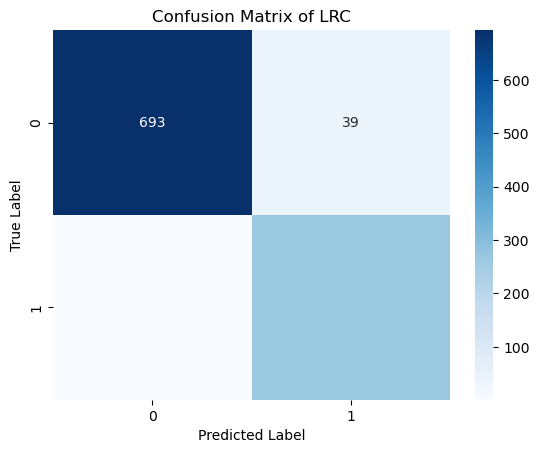

In [79]:
# Generate confusion matrix
matrix1 = confusion_matrix(y_test1, y_pred_test1)
# Plot confusion matrix as heatmap
sns.heatmap(matrix1, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of LRC')
plt.show()

In [84]:
# Generate classification report
report2 = classification_report(y_test, y_pred_test2)
print("classification report of SVC : \n")
print(report2)

classification report of SVC : 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       732
           1       0.94      0.98      0.96       267

   micro avg       0.98      0.98      0.98       999
   macro avg       0.97      0.98      0.97       999
weighted avg       0.98      0.98      0.98       999
 samples avg       0.98      0.98      0.98       999



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
#inverse one hot encoder
y_test2=inverse_onehot(y_test)
y_pred_test2=inverse_onehot(y_pred_test2)

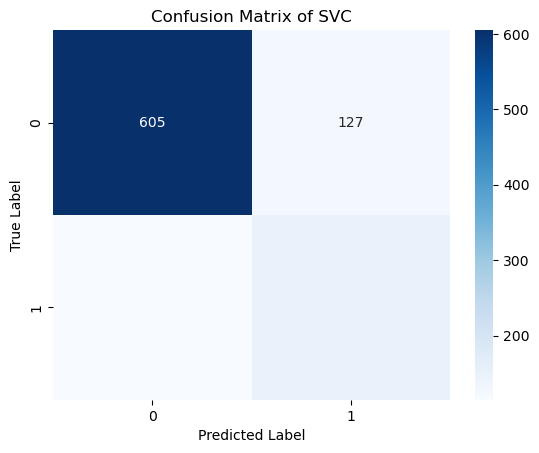

In [87]:
# Generate confusion matrix
matrix2 = confusion_matrix(y_test2, y_pred_test2)
# Plot confusion matrix as heatmap
sns.heatmap(matrix2, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of SVC')
plt.show()

In [90]:
# Generate classification report
report3 = classification_report(y_test, y_pred_test3)
print("classification report of DTC : \n")
print(report3)

classification report of DTC : 

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       732
           1       0.76      0.94      0.84       267

   micro avg       0.90      0.90      0.90       999
   macro avg       0.87      0.92      0.89       999
weighted avg       0.92      0.90      0.91       999
 samples avg       0.90      0.90      0.90       999



In [91]:
#inverse one hot encoder
y_test3=inverse_onehot(y_test)
y_pred_test3=inverse_onehot(y_pred_test3)

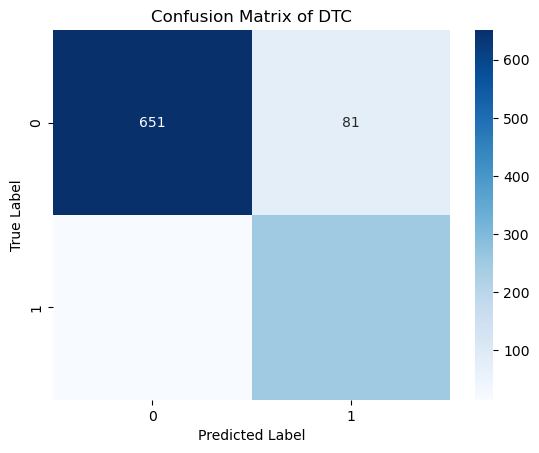

In [92]:
# Generate confusion matrix
matrix3 = confusion_matrix(y_test3, y_pred_test3)
# Plot confusion matrix as heatmap
sns.heatmap(matrix3, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of DTC')
plt.show()

In [93]:
# Generate classification report
report4 = classification_report(y_test, y_pred_test4)
print("classification report of KNN : \n")
print(report4)

classification report of KNN : 

              precision    recall  f1-score   support

           0       1.00      0.49      0.66       732
           1       0.42      1.00      0.59       267

   micro avg       0.62      0.62      0.62       999
   macro avg       0.71      0.74      0.62       999
weighted avg       0.84      0.62      0.64       999
 samples avg       0.62      0.62      0.62       999



In [94]:
#inverse one hot encoder
y_test4=inverse_onehot(y_test)
y_pred_test4=inverse_onehot(y_pred_test4)

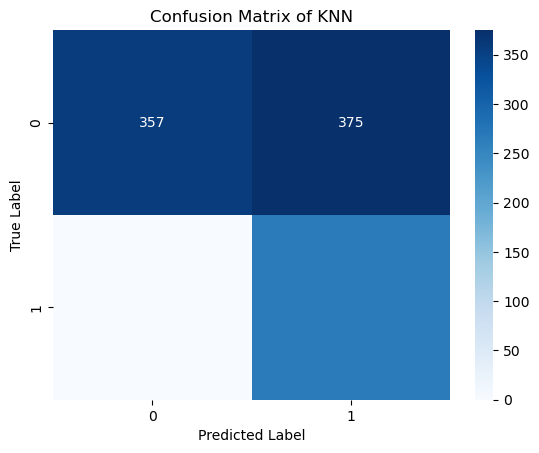

In [95]:
# Generate confusion matrix
matrix4 = confusion_matrix(y_test4, y_pred_test4)
# Plot confusion matrix as heatmap
sns.heatmap(matrix4, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()

In [96]:
# Generate classification report
report5 = classification_report(y_test, y_pred_test5)
print("classification report of RFC : \n")
print(report5)

classification report of RFC : 

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       732
           1       0.79      1.00      0.88       267

   micro avg       0.93      0.93      0.93       999
   macro avg       0.90      0.95      0.92       999
weighted avg       0.94      0.93      0.93       999
 samples avg       0.93      0.93      0.93       999



In [97]:
#inverse one hot encoder
y_test5=inverse_onehot(y_test)
y_pred_test5=inverse_onehot(y_pred_test5)

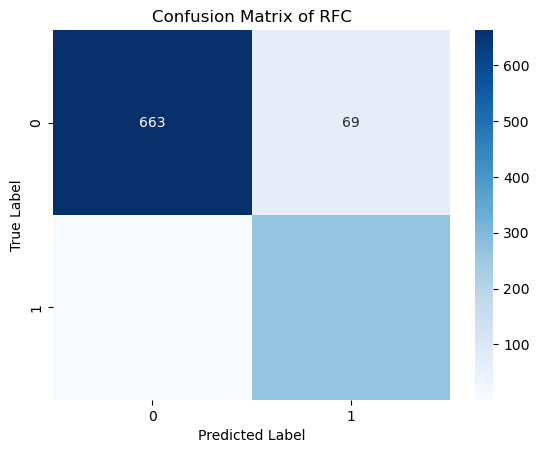

In [98]:
# Generate confusion matrix
matrix5 = confusion_matrix(y_test5, y_pred_test5)
# Plot confusion matrix as heatmap
sns.heatmap(matrix5, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of RFC')
plt.show()

In [99]:
# Generate classification report
report6 = classification_report(y_test, y_pred_test6)
print("classification report of NBC : \n")
print(report6)

classification report of NBC : 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       732
           1       0.89      0.94      0.91       267

   micro avg       0.95      0.95      0.95       999
   macro avg       0.93      0.95      0.94       999
weighted avg       0.95      0.95      0.95       999
 samples avg       0.95      0.95      0.95       999



In [100]:
#inverse one hot encoder
y_test6=inverse_onehot(y_test)
y_pred_test6=inverse_onehot(y_pred_test6)

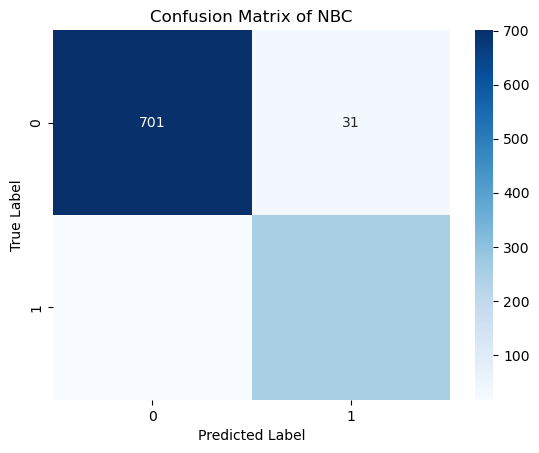

In [101]:
# Generate confusion matrix
matrix6 = confusion_matrix(y_test6, y_pred_test6)
# Plot confusion matrix as heatmap
sns.heatmap(matrix6, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of NBC')
plt.show()

## Save the models

In [53]:
pickle.dump(multi_target_lrc,open('LRC_model.pkl','wb'))

In [54]:
pickle.dump(multi_target_svc,open('SVC_model.pkl','wb'))

In [67]:
pickle.dump(multi_target_DTC,open('DTC_model.pkl','wb'))

In [45]:
pickle.dump(multi_target_KNN,open('KNN_model.pkl','wb'))

In [59]:
pickle.dump(multi_target_RFC,open('RFC_model.pkl','wb'))

In [63]:
pickle.dump(multi_target_NBC,open('NBC_model.pkl','wb'))

## Load the models

In [44]:
def load_models():
    file = open(r'models\LRC_model.pkl', 'rb')
    LRC= pickle.load(file)   
    file = open(r'models\SVC_model.pkl', 'rb')
    SVC= pickle.load(file) 
    file = open(r'models\DTC_model.pkl', 'rb')
    DTC= pickle.load(file) 
    file = open(r'models\KNN_model.pkl', 'rb')
    KNN= pickle.load(file) 
    file = open(r'models\RFC_model.pkl', 'rb')
    RFC= pickle.load(file)
    file = open(r'models\NBC_model.pkl', 'rb')
    NBC= pickle.load(file) 
    return LRC,SVC,DTC,KNN,RFC,NBC  

In [45]:
LRC,SVC,DTC,KNN,RFC,NBC =load_models()

## Save evaluation of models

In [61]:
pickle.dump(train_accuracy1,open(r'evaluation\LRC_train_accuracy.pkl','wb'))
pickle.dump(test_accuracy1,open(r'evaluation\LRC_test_accuracy.pkl','wb'))
pickle.dump(report1,open(r'evaluation\LRC_report.pkl','wb'))
pickle.dump(matrix1,open(r'evaluation\LRC_matrix.pkl','wb'))

In [62]:
pickle.dump(train_accuracy2,open(r'evaluation\SVC_train_accuracy.pkl','wb'))
pickle.dump(test_accuracy2,open(r'evaluation\SVC_test_accuracy.pkl','wb'))
pickle.dump(report2,open(r'evaluation\SVC_report.pkl','wb'))
pickle.dump(matrix2,open(r'evaluation\SVC_matrix.pkl','wb'))

In [87]:
pickle.dump(train_accuracy3,open(r'evaluation\DTC_train_accuracy.pkl','wb'))
pickle.dump(test_accuracy3,open(r'evaluation\DTC_test_accuracy.pkl','wb'))
pickle.dump(report3,open(r'evaluation\DTC_report.pkl','wb'))
pickle.dump(matrix3,open(r'evaluation\DTC_matrix.pkl','wb'))

In [88]:
pickle.dump(train_accuracy4,open(r'evaluation\KNN_train_accuracy.pkl','wb'))
pickle.dump(test_accuracy4,open(r'evaluation\KNN_test_accuracy.pkl','wb'))
pickle.dump(report4,open(r'evaluation\KNN_report.pkl','wb'))
pickle.dump(matrix4,open(r'evaluation\KNN_matrix.pkl','wb'))

In [89]:
pickle.dump(train_accuracy5,open(r'evaluation\RFC_train_accuracy.pkl','wb'))
pickle.dump(test_accuracy5,open(r'evaluation\RFC_test_accuracy.pkl','wb'))
pickle.dump(report5,open(r'evaluation\RFC_report.pkl','wb'))
pickle.dump(matrix5,open(r'evaluation\RFC_matrix.pkl','wb'))

In [54]:
pickle.dump(train_accuracy6,open(r'evaluation\NBC_train_accuracy.pkl','wb'))
pickle.dump(test_accuracy6,open(r'evaluation\NBC_test_accuracy.pkl','wb'))
pickle.dump(report6,open(r'evaluation\NBC_report.pkl','wb'))
pickle.dump(matrix6,open(r'evaluation\NBC_matrix.pkl','wb'))